(300, 277, 3)
Has stop sign = 0.9410001118977864


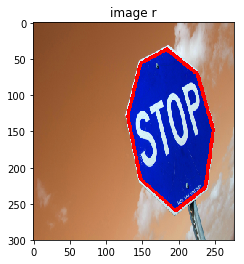

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("stop2.jpeg")
resized = cv2.resize(image, (277, 300))

w,h,c = resized.shape

print(resized.shape)


def has_stop_sign(clean_image, drawable_image):
    found_stop_sign = False

    blurred = cv2.GaussianBlur(clean_image, (5, 5), 0)
    b,g,r = cv2.split(blurred)

    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV

    red_lower1 = np.array([  0, 100, 100])
    red_upper1 = np.array([  10, 255, 255])

    red_lower2 = np.array([  170, 100, 100])
    red_upper2 = np.array([  180, 255, 255])

    # Threshold the HSV image to get only blue colors
    mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    mask2 = cv2.inRange(hsv, red_lower2, red_upper2)

    mask = cv2.bitwise_or(mask1, mask2)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(blurred,blurred, mask=mask)

    contours,h = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.03*cv2.arcLength(cnt,True),True)

        if len(approx) == 8:
            size = cv2.arcLength(cnt,True)
            cv2.drawContours(drawable_image, [approx], -1, (255, 0, 0), 4)
            found_stop_sign = size/(clean_image.shape[0] + clean_image.shape[0])
    
    return found_stop_sign
    
result = has_stop_sign(resized, resized)

print(f"Has stop sign = {result}")

plt.title('image r')
plt.imshow(resized)
plt.show()


    
    
# find contours in the thresholded image and initialize the
# shape detector
# cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print(cnts[0])
# cnts = cnts[0]

# for c in cnts:
#     # compute the center of the contour, then detect the name of the
#     # shape using only the contour
#     M = cv2.moments(c)
#     cX = int((M["m10"] / M["m00"]))
#     cY = int((M["m01"] / M["m00"]))

    
#     print("len", len(c))

#     # multiply the contour (x, y)-coordinates by the resize ratio,
#     # then draw the contours and the name of the shape on the image
# #     c = c.astype("float")
# #     c = c.astype("int")
# #     cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
# #     cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
# #         0.5, (255, 255, 255), 2)

# #     # show the output image
# #     cv2.imshow("Image", image)
# #     cv2.waitKey(0)